In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import re
import matplotlib.pyplot as plt
import warnings 
import tensorflow as tf
warnings.filterwarnings(action='ignore')
from tensorflow.keras import preprocessing
import seaborn as sns
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords

C:\Users\zzang\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\zzang\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\zzang\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\zzang\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

In [2]:
train = pd.read_csv('train.csv', encoding = 'utf-8')
test = pd.read_csv('test_x.csv', encoding = 'utf-8')
sample_submission = pd.read_csv('sample_submission.csv', encoding = 'utf-8')

In [3]:
train.head()

,index,text,author
0,0,"He was almost choking. There was so much, so m...",3
1,1,"“Your sister asked for it, I suppose?”",2
2,2,"She was engaged one day as she walked, in per...",1
3,3,"The captain was in the porch, keeping himself ...",4
4,4,"“Have mercy, gentlemen!” odin flung up his han...",3


In [4]:
test.head()

,index,text
0,0,“Not at all. I think she is one of the most ch...
1,1,"""No,"" replied he, with sudden consciousness, ""..."
2,2,As the lady had stated her intention of scream...
3,3,“And then suddenly in the silence I heard a so...
4,4,His conviction remained unchanged. So far as I...


## 전처리

In [6]:
def alpha_num(text):#기호 제거
    return re.sub(r'[^A-Za-z0-9]', '', text)
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", 
             "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", 
             "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", 
             "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", 
             "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", 
             "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", 
             "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", 
             "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", 
             "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", 
             "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", 
             "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

In [7]:
def remove_stopwords(text):#불용어처리
    final_text=[]
    for i in text.split():
        if i.strip().lower() not in stopwords:
            final_text.append(i.strip())
    return ' '.join(final_text)

In [8]:
train['text']=train['text'].str.lower()
test['text']=test['text'].str.lower()
train['text']=train['text'].apply(alpha_num).apply(remove_stopwords)
test['text']=test['text'].apply(alpha_num).apply(remove_stopwords)
train.head()

,index,text,author
0,0,almost choking much much wanted say strange ex...,3
1,1,sister asked suppose,2
2,2,engaged one day walked perusing janes last let...,1
3,3,captain porch keeping carefully way treacherou...,4
4,4,mercy gentlemen odin flung hands dont write an...,3


In [9]:
test.head()

,index,text
0,0,not think one charming young ladies ever met m...
1,1,no replied sudden consciousness not find canno...
2,2,lady stated intention screaming course screame...
3,3,suddenly silence heard sound sent heart mouth ...
4,4,conviction remained unchanged far knowand beli...


Text(0, 0.5, 'frequency')

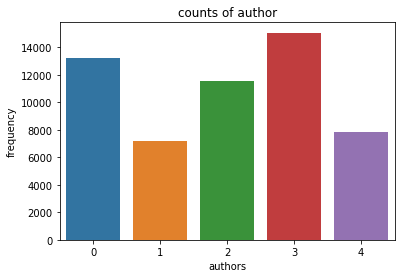

In [10]:
#작가별 countplot
ax=plt.subplots()
ax=sns.countplot('author',data=train)
ax.set_title('counts of author')
ax.set_xlabel('authors')
ax.set_ylabel('frequency')

0,3번째 작가들의 작품이 많다.

## EDA (train)

In [77]:
vocab={}
for sent in train['text']:
    for word in sent.split():
        if word not in vocab.keys():
            vocab[word]=len(vocab)
print(vocab)

{'almost': 0, 'choking': 1, 'much': 2, 'wanted': 3, 'say': 4, 'strange': 5, 'exclamations': 6, 'came': 7, 'lips': 8, 'pole': 9, 'gazed': 10, 'fixedly': 11, 'bundle': 12, 'notes': 13, 'hand': 14, 'looked': 15, 'odin': 16, 'evident': 17, 'perplexity': 18, 'sister': 19, 'asked': 20, 'suppose': 21, 'engaged': 22, 'one': 23, 'day': 24, 'walked': 25, 'perusing': 26, 'janes': 27, 'last': 28, 'letter': 29, 'dwelling': 30, 'passages': 31, 'proved': 32, 'jane': 33, 'not': 34, 'written': 35, 'spirits': 36, 'instead': 37, 'surprised': 38, 'mr': 39, 'saw': 40, 'looking': 41, 'meeting': 42, 'putting': 43, 'away': 44, 'immediately': 45, 'forcing': 46, 'smile': 47, 'said': 48, 'captain': 49, 'porch': 50, 'keeping': 51, 'carefully': 52, 'way': 53, 'treacherous': 54, 'shot': 55, 'intended': 56, 'turned': 57, 'spoke': 58, 'us': 59, 'doctors': 60, 'watch': 61, 'lookout': 62, 'dr': 63, 'take': 64, 'north': 65, 'side': 66, 'please': 67, 'jim': 68, 'east': 69, 'gray': 70, 'west': 71, 'hands': 72, 'load': 73,

In [78]:
print(len(vocab)) #vocab_size는 47136

47136


In [100]:
#문장 단어 분포도
text_len=[len(s.split()) for s in train['text']]
print('가장 적은 단어 수 : {}'.format(np.min(text_len)))
print('가장 많은 단어 수 : {}'.format(np.max(text_len)))
print('평균 문장 단어 : {}'.format(np.mean(text_len)))

가장 적은 단어 수 : 0
가장 많은 단어 수 : 211
평균 문장 단어 : 20.15441243462891


In [15]:
text_len[0]

20

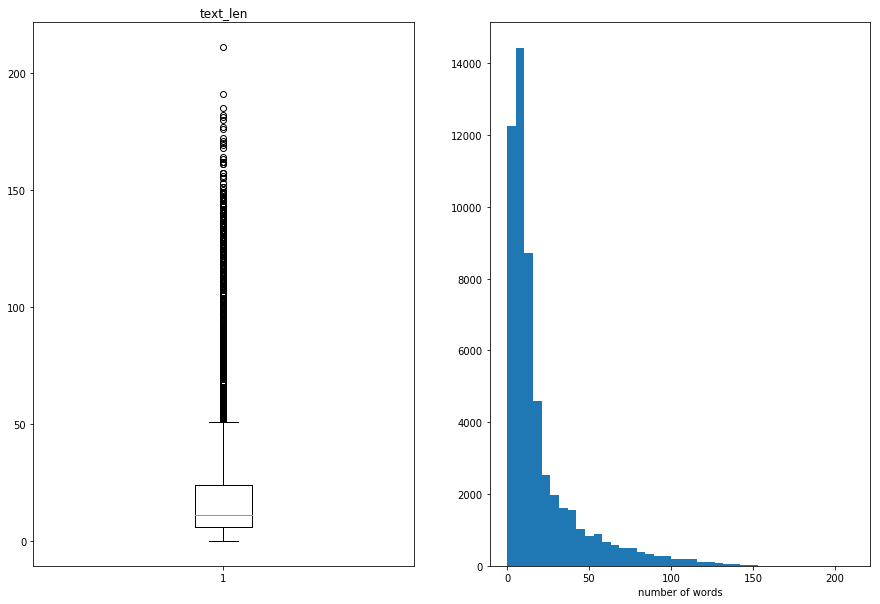

In [16]:
#문장의 단어 분포
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('text_len')

plt.subplot(1,2,2)
plt.hist(text_len,bins=40)
plt.xlabel('number of words')
plt.show()

문장 단어의 개수는 100 이하가 대부분이고 제3사분위수가 50,최소값이 0이고 텍스트의 평균은 20이다. 가장 높은 값은 211이다. 

## 문장길이 분포

In [29]:
str_len=[len(s) for s in train['text']]
print('가장 짧은 문장 : {}'.format(np.min(str_len)))
print('가장 긴 문장 : {}'.format(np.max(str_len)))
print('평균 문장 : {}'.format(np.mean(str_len)))

가장 짧은 문장 : 0
가장 긴 문장 : 1433
평균 문장 : 133.4308205324441


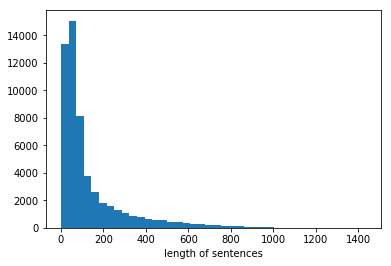

In [66]:
plt.hist(str_len,bins=40)
plt.xlabel('length of sentences')
plt.show()
#가장 긴 문장은 1433, 가장 짧은 문장은 0, 평균문장 길이는 133이다.

## 작가마다 많이 사용한 단어 분포

In [82]:
def plot_wordcloud(text):
    def preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lmtzr=WordNetLemmatizer()
        stemmer = PorterStemmer()
        for a in text:
            tokens = [word for word in nltk.word_tokenize(a)]
            tokens=[lmtzr.lemmatize(word) for word in tokens if len(word)>1]
            tokens = [stemmer.stem(word) for word in tokens ]
            corpus.extend(tokens)
        return corpus
    corpus=preprocess_text(text)
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(stopwords),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    wordcloud = wordcloud.generate(str(corpus))
    return wordcloud

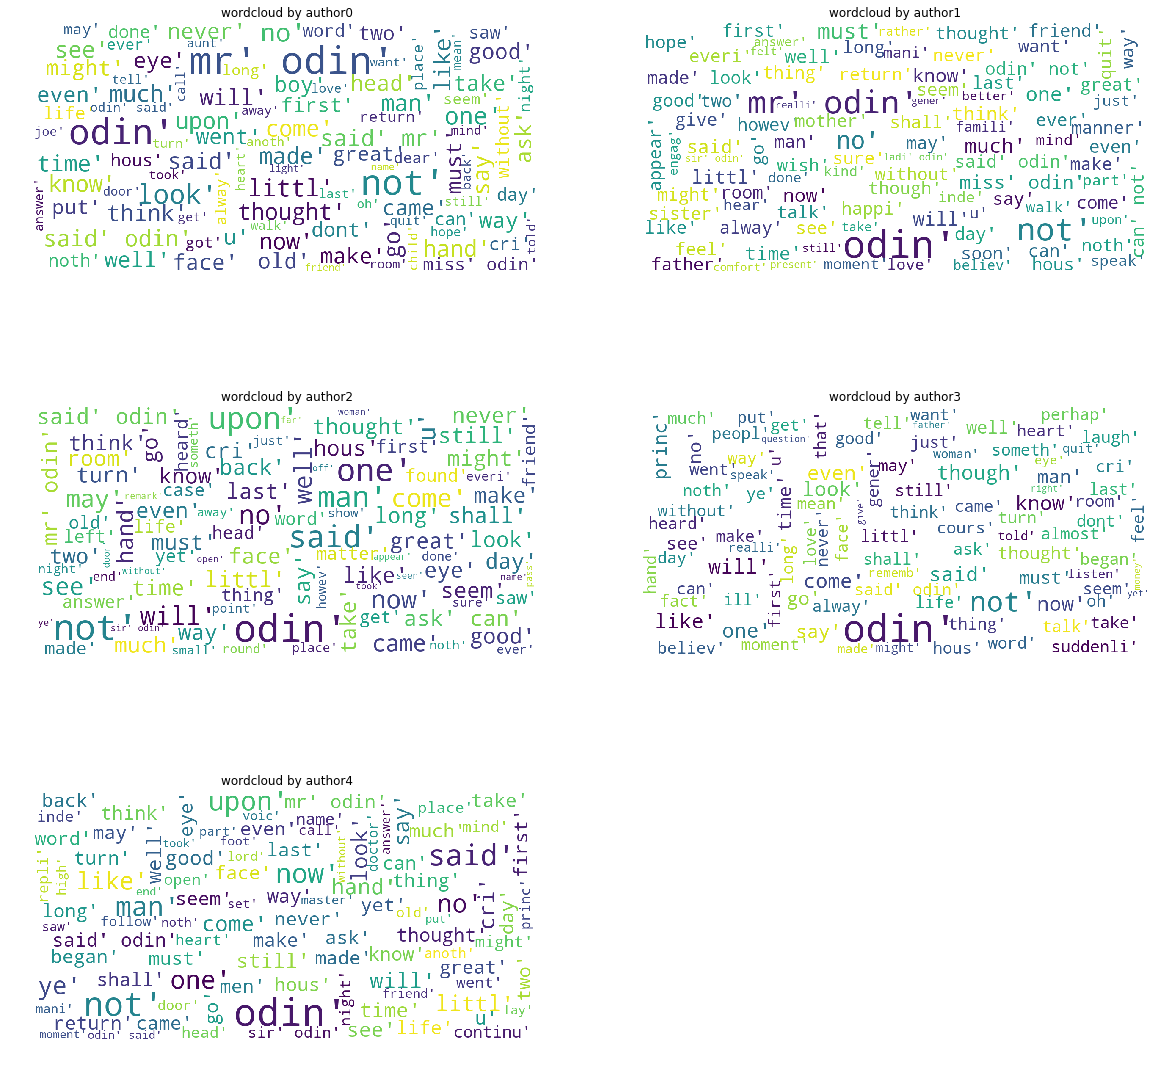

In [83]:
fig=plt.figure(figsize=(20,20))
rows=3
cols=2
for i in range(5):
    wordcloud=plot_wordcloud(train[train['author']==i]['text'])
    ax=fig.add_subplot(rows,cols,i+1)
    ax.axis('off')
    ax.set_title('wordcloud by author{}'.format(i))
    ax.imshow(wordcloud)

In [96]:
#명사만 추출
nltk.download('averaged_perceptron_tagger')
def plot_wordcloud_noun(text,tags=['NN','NLP']):
    def _preprocess_text(text,tags):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in nltk.word_tokenize(news)]
            words=[lem.lemmatize(w) for w in words if len(w)>2]
            
            tagged = nltk.pos_tag(words)
            allnoun = [word for word, pos in tagged if pos in tags]

            corpus.append(allnoun)
        return corpus
    
    corpus=_preprocess_text(text,tags)
    
    wordcloud = WordCloud(
        background_color='white',
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))
    
    return wordcloud

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\zzang\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


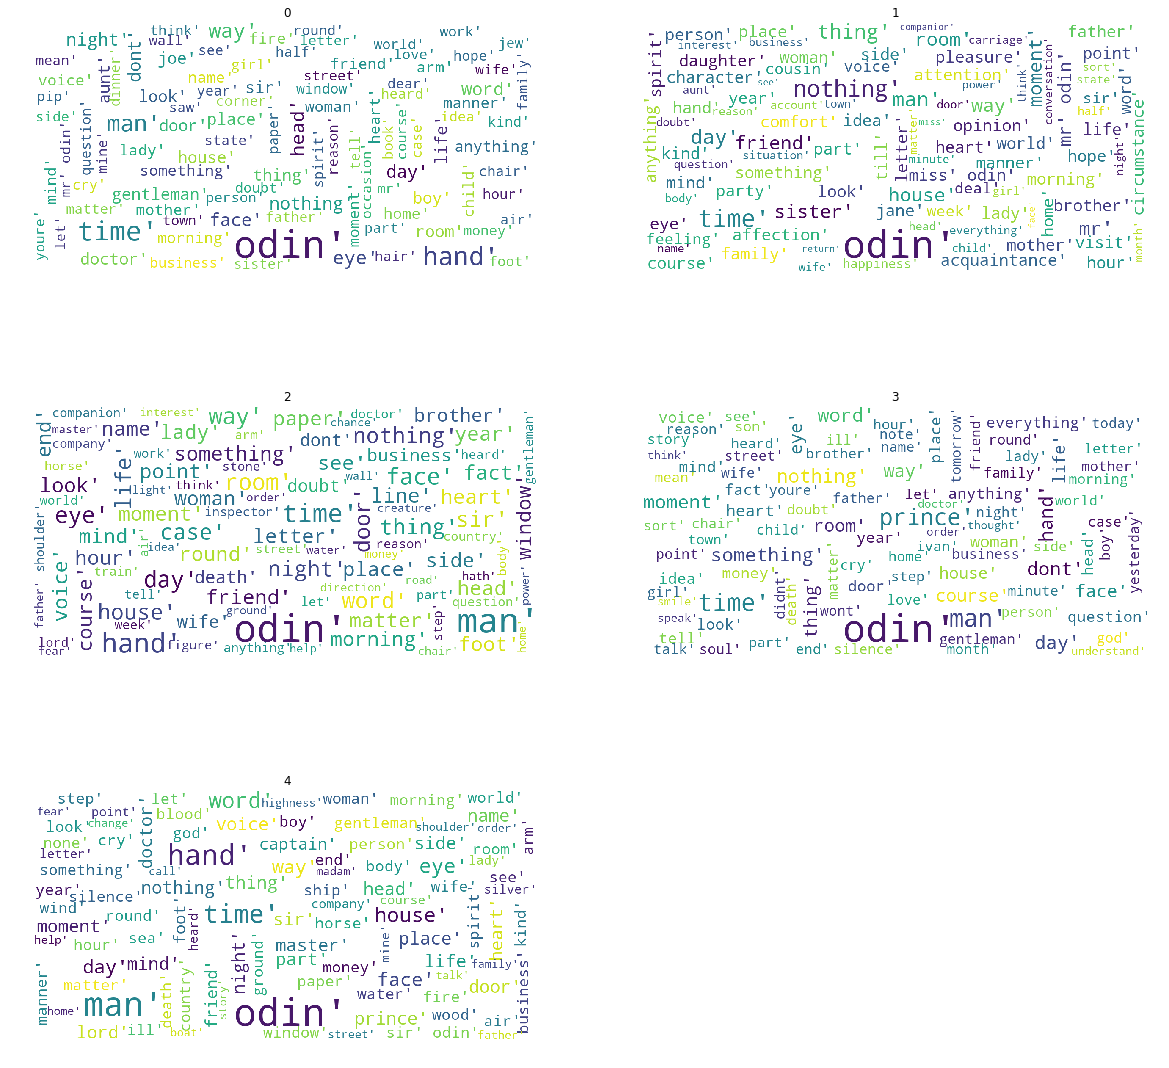

In [97]:
fig = plt.figure(figsize=(20,20)) # rows*cols 행렬의 i번째 subplot 생성
rows = 3
cols = 2

for i in range(5):
    wordcloud = plot_wordcloud_noun(train[train['author']==i]['text'], ['NN','NNP'])
    ax = fig.add_subplot(rows, cols, i+1)
    ax.axis('off')
    ax.set_title(i)
    ax.imshow(wordcloud)

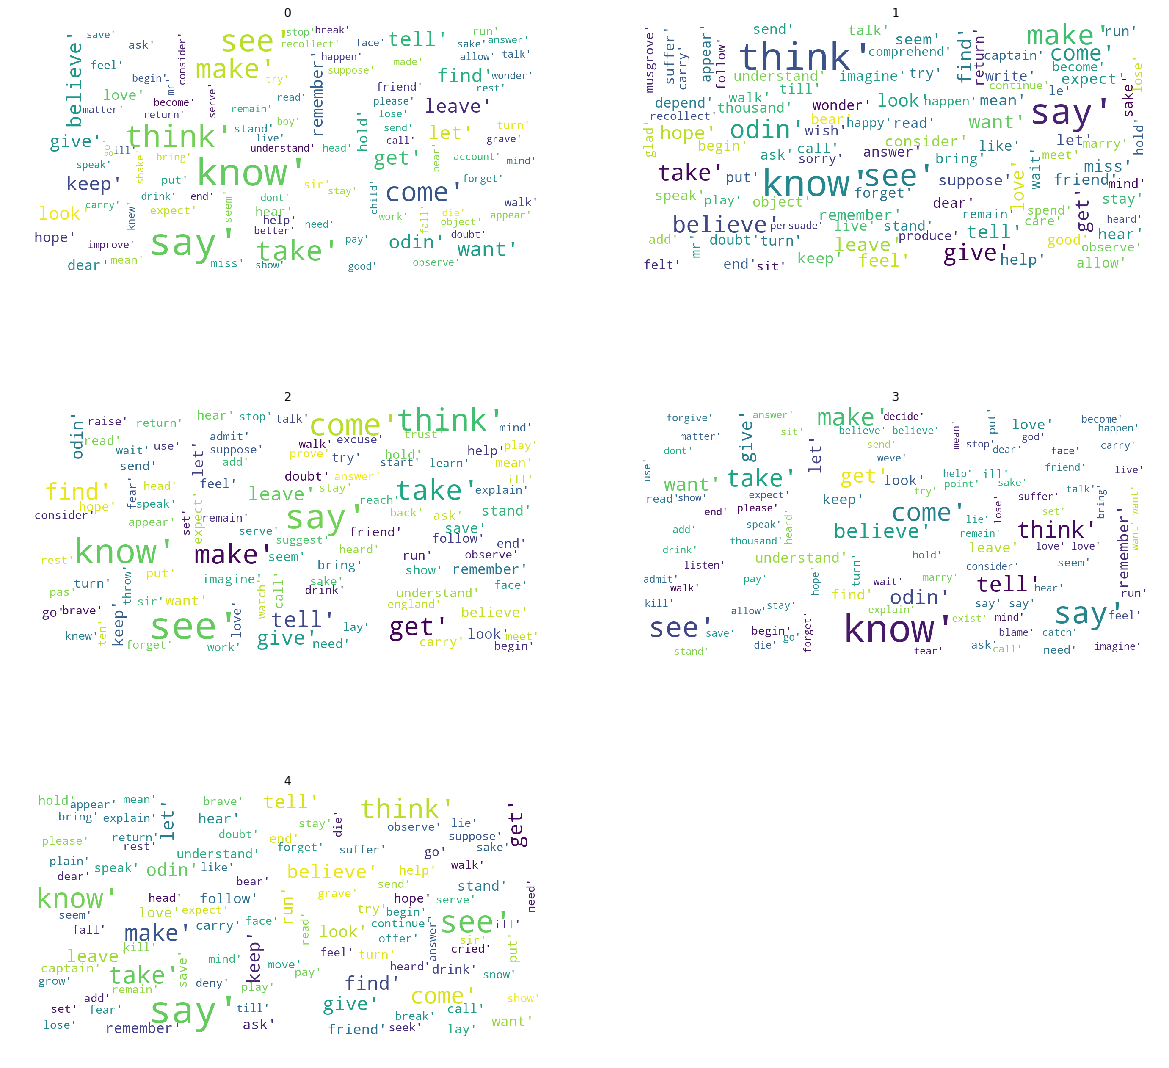

In [99]:
#동사
fig = plt.figure(figsize=(20,20)) # rows*cols 행렬의 i번째 subplot 생성
rows = 3
cols = 2

for i in range(5):
    wordcloud = plot_wordcloud_noun(train[train['author']==i]['text'], ['VB','VBP'])
    ax = fig.add_subplot(rows, cols, i+1)
    ax.axis('off')
    ax.set_title(i)
    ax.imshow(wordcloud)

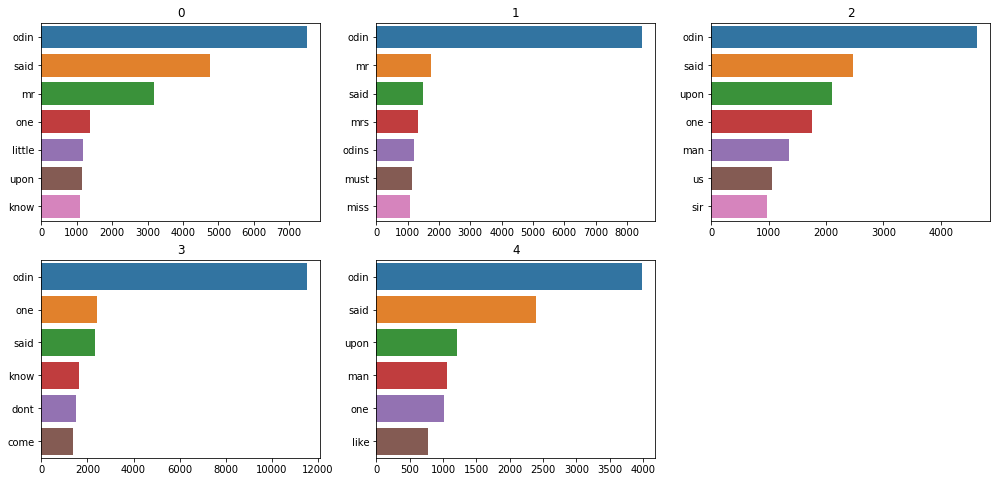

In [88]:
fig=plt.figure(figsize=(17,8)) #전처리 한 상태에서 제일 많이 나온 단어
rows=2
cols=3
def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    new=text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    counter=Counter(corpus)
    most=counter.most_common()
    x,y=[],[]
    for word,count in most[:10]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    return x,y
for i in range(5):
    x,y = plot_top_non_stopwords_barchart(train[train['author']==i]['text'])
    ax = fig.add_subplot(rows, cols, i+1)
    ax.set_title(i)
    sns.barplot(x=y,y=x)

## Embedding

In [17]:
x_train = np.array([x for x in train['text']])
x_test = np.array([x for x in test['text']])
y_train = np.array([x for x in train['author']])

In [18]:
vocab_size=40000
embedding_dim=16
max_length=200
padding_type='post'

In [19]:
tokenizer=Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(x_train)
word_index=tokenizer.word_index

In [20]:
train_sequences = tokenizer.texts_to_sequences(x_train)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)

test_sequences = tokenizer.texts_to_sequences(x_test)
test_padded = pad_sequences(test_sequences, padding=padding_type, maxlen=max_length)

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

Instructions for updating:
Colocations handled automatically by placer.


In [22]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model summary
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 16)           640000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 125       
Total params: 640,533
Trainable params: 640,533
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
num_epochs = 20
history = model.fit(train_padded, y_train, 
                    epochs=num_epochs, verbose=2, 
                    validation_split=0.2)

Train on 43903 samples, validate on 10976 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
 - 17s - loss: 1.5188 - acc: 0.3236 - val_loss: 1.3800 - val_acc: 0.4497
Epoch 2/20
 - 17s - loss: 1.2025 - acc: 0.5131 - val_loss: 1.1191 - val_acc: 0.5354
Epoch 3/20
 - 16s - loss: 1.0166 - acc: 0.5935 - val_loss: 1.0298 - val_acc: 0.5864
Epoch 4/20
 - 16s - loss: 0.9012 - acc: 0.6535 - val_loss: 0.9341 - val_acc: 0.6444
Epoch 5/20
 - 18s - loss: 0.8008 - acc: 0.7046 - val_loss: 0.8770 - val_acc: 0.6713
Epoch 6/20
 - 17s - loss: 0.7148 - acc: 0.7420 - val_loss: 0.8266 - val_acc: 0.6935
Epoch 7/20
 - 16s - loss: 0.6447 - acc: 0.7693 - val_loss: 0.7943 - val_acc: 0.7081
Epoch 8/20
 - 17s - loss: 0.5889 - acc: 0.7893 - val_loss: 0.7837 - val_acc: 0.7050
Epoch 9/20
 - 17s - loss: 0.5437 - acc: 0.8076 - val_loss: 0.7649 - val_acc: 0.7171
Epoch 10/20
 - 17s - loss: 0.5037 - acc: 0.8202 - val_loss: 0.7580 - val_acc: 0.7268
Epoch 11/20
 - 21s - loss: 0.4705 - acc: 0.8327 - val_loss: 0

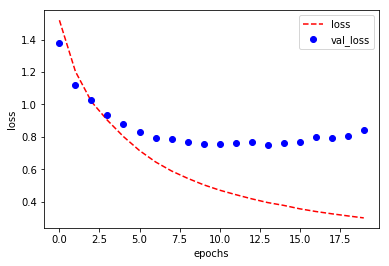

In [24]:
plt.plot(history.history['loss'],'r--',label='loss')
plt.plot(history.history['val_loss'],'bo',label='val_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
#loss값은 줄어들지만 val_loss는 1로 수렴하는 편

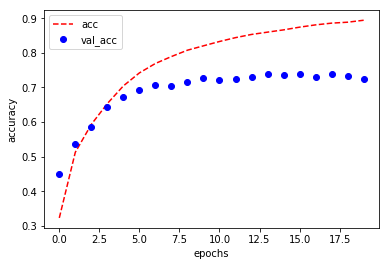

In [25]:
plt.plot(history.history['acc'],'r--',label='acc')
plt.plot(history.history['val_acc'],'bo',label='val_acc')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()
#acc는 0.9까지 증가하지만 val_loss는 0.7밖에 안된다. 과적합이 많이 생긴다